## On our data, we are going to focus on the influence of our data and the average grade

In [1]:
#import libraries
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#import of our clean data
students = pd.read_csv('./students_por_clean.csv')

In [3]:
students.head()

,age,sex,studytime,schoolsup,famsup,paid,Fedu,Medu,failures,absences,higher,internet,avg_grade
0,17,F,2,no,yes,no,1,1,0,2,yes,yes,10.0
1,15,F,2,yes,no,no,1,1,0,6,yes,yes,12.0
2,15,F,3,no,yes,no,2,4,0,0,yes,yes,14.0
3,16,F,2,no,yes,no,3,3,0,0,yes,no,12.0
4,16,M,2,no,yes,no,3,4,0,6,yes,yes,12.0


age : age of the student
sex : sex of the student
studytime : weekly time the student study for portuguese. 
        1 = less than 2 hours weekly
        2 = between 2h and 5 hours weekly
        3 = between 5h and 10 hours weekly
        4 = more than 10 hours weekly
schoolsup : if the student have extra educational support from school
famsup : if the student have family educational support
paid : if the student have extra paid classes within the class subject
Fedu, Medu : Father and Mother educational level (0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
failures : number of past class failures (numeric: n if 1<=n<3, else 4) 
absences :  number of school absences (numeric: from 0 to 93)
higher : if the student want to take higher education
internet : if the student have internet access at home
avg_grade : mean of the 3 periods grades

In [4]:
students.describe()

,age,studytime,Fedu,Medu,failures,absences,avg_grade
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,16.583004,1.980237,2.377470,2.581028,0.187747,3.944664,12.007905
std,1.234018,0.851094,1.085369,1.107292,0.547115,4.960527,2.429998
min,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,16.000000,1.000000,1.000000,2.000000,0.000000,0.000000,10.000000
50%,16.000000,2.000000,2.000000,3.000000,0.000000,2.000000,12.000000
75%,17.000000,2.000000,3.000000,4.000000,0.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,3.000000,32.000000,19.000000


In [5]:
students.groupby('age').mean()

,studytime,Fedu,Medu,failures,absences,avg_grade
age,,,,,,
15,2.000000,2.522936,2.779817,0.036697,2.724771,11.899083
16,1.885906,2.416107,2.530201,0.127517,3.161074,12.127517
17,1.977444,2.330827,2.496241,0.210526,4.654135,12.165414
18,2.127907,2.325581,2.627907,0.255814,5.151163,12.220930
19,2.000000,2.142857,2.380952,0.523810,4.952381,10.285714
20,1.800000,1.400000,2.000000,0.800000,5.800000,11.800000
21,2.500000,2.500000,2.500000,2.000000,10.500000,10.500000
22,1.000000,1.000000,3.000000,3.000000,12.000000,7.000000


In [6]:
students.groupby('paid').mean()

,age,studytime,Fedu,Medu,failures,absences,avg_grade
paid,,,,,,,
no,16.586134,1.981092,2.352941,2.552521,0.172269,3.991597,12.046218
yes,16.533333,1.966667,2.766667,3.033333,0.433333,3.200000,11.400000


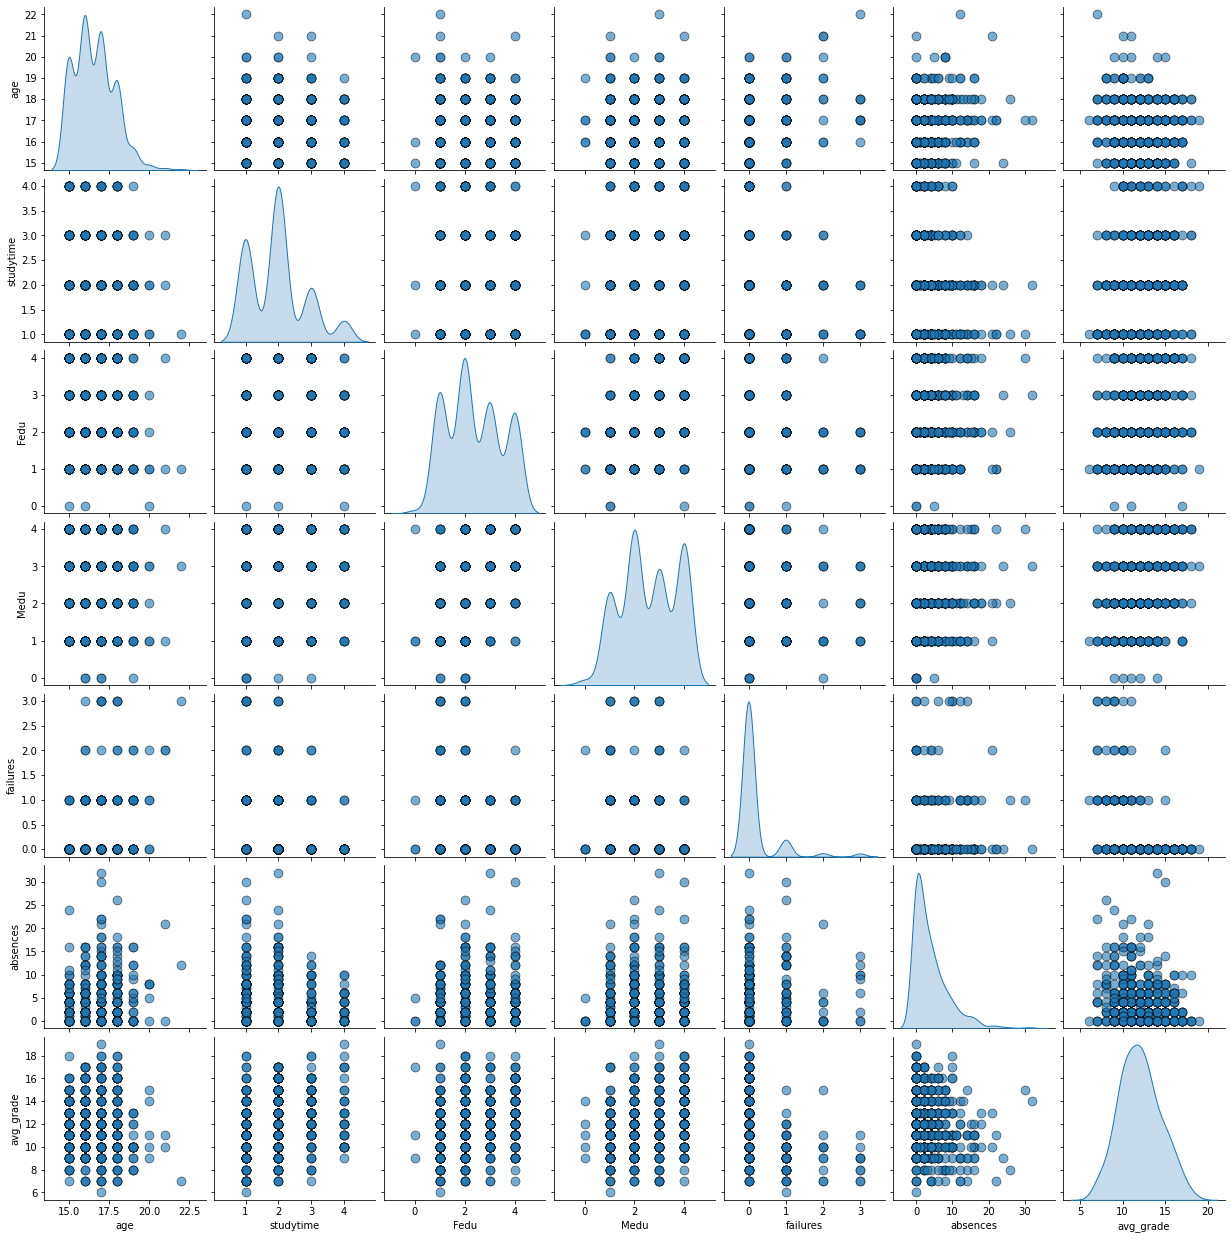

In [7]:
#let's hace a first look at our  data
sns.pairplot(students, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

<AxesSubplot:>

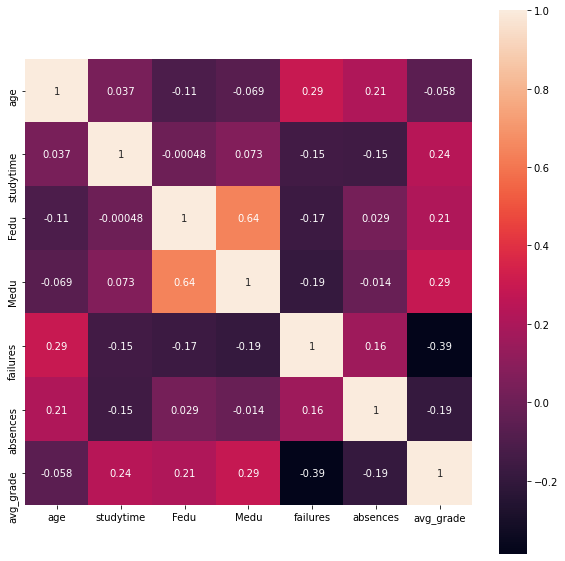

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=students.corr(),annot=True,square=True)

In [9]:
'''
there is very few correlation. the only correlation we see is the parents education. parents with higher education
seems to get together and have childs more easily. maybe because they met during studies ?
we can observe that our boolean and categorical data are not here 
'''

'\nwe can observe that our boolean and categorical data are not here \n'

<AxesSubplot:xlabel='sex-schoolsup-famsup-paid-higher-internet', ylabel='avg_grade'>

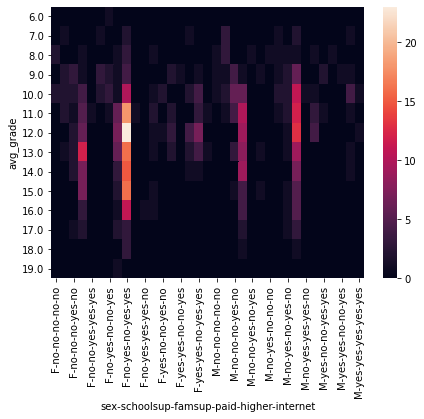

In [54]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.crosstab(index=students['avg_grade'], columns=[students['sex'],students['schoolsup'],students['famsup'],students['paid'],students['higher'],students['internet']]))

## The grade column

In [11]:
print(students["avg_grade"].describe())

count    506.000000
mean      12.007905
std        2.429998
min        6.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: avg_grade, dtype: float64


In [12]:
print(f'there is {len(students["avg_grade"].unique())} unique grade')

there is 14 unique grade


<AxesSubplot:>

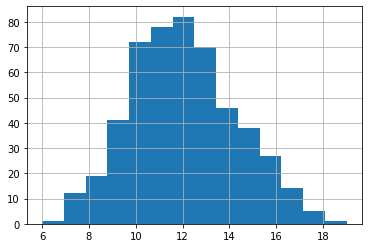

In [13]:
students['avg_grade'].hist(bins=14)

In [55]:
students.groupby('avg_grade').mean()

,age,studytime,Fedu,Medu,failures,absences
avg_grade,,,,,,
6.0,17.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7.0,17.250000,1.416667,1.916667,2.333333,1.166667,7.166667
8.0,17.000000,1.789474,1.736842,1.894737,0.842105,7.210526
9.0,16.609756,1.536585,2.121951,2.073171,0.609756,5.219512
10.0,16.944444,1.916667,2.097222,2.333333,0.305556,4.375000
11.0,16.423077,1.871795,2.358974,2.397436,0.128205,4.782051
12.0,16.317073,2.048780,2.426829,2.634146,0.036585,2.829268
13.0,16.414286,2.042857,2.557143,2.771429,0.014286,3.042857
14.0,16.326087,2.195652,2.521739,2.717391,0.000000,3.782609


In [58]:
students.groupby('avg_grade')['avg_grade'].count()

avg_grade
6.0      1
7.0     12
8.0     19
9.0     41
10.0    72
11.0    78
12.0    82
13.0    70
14.0    46
15.0    38
16.0    27
17.0    14
18.0     5
19.0     1
Name: avg_grade, dtype: int64

In [ ]:
'''
as the grade increase, sames seems to happens to mother education
higher grades correspond with lower failures
also, the lowest grades seems correspond to lowers father and mother education
'''

# failures and absences columns

In [72]:
students.groupby('failures').mean()

,age,studytime,Fedu,Medu,absences,avg_grade
failures,,,,,,
0,16.448747,2.029613,2.437358,2.671982,3.574032,12.407745
1,17.187500,1.666667,2.145833,2.000000,6.812500,9.479167
2,18.500000,1.900000,1.700000,1.900000,3.700000,9.600000
3,17.777778,1.333333,1.444444,2.000000,7.000000,8.666667


In [73]:
students.groupby('failures')['avg_grade'].describe()

,count,mean,std,min,25%,50%,75%,max
failures,,,,,,,,
0,439.0,12.407745,2.266499,7.0,11.00,12.0,14.0,19.0
1,48.0,9.479167,1.688378,6.0,8.00,9.0,10.0,15.0
2,10.0,9.600000,2.319004,7.0,8.25,9.5,10.0,15.0
3,9.0,8.666667,1.322876,7.0,8.00,9.0,9.0,11.0


<AxesSubplot:xlabel='failures', ylabel='avg_grade'>

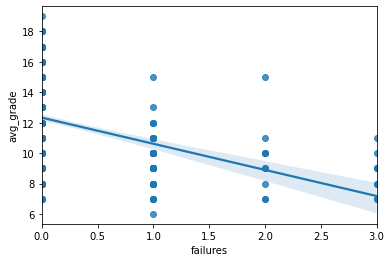

In [74]:
sns.regplot(x='failures',y='avg_grade',data=students)

In [ ]:
'''
it appear that the higher the number of failures, the lower the avg_grade is
'''

In [77]:
students.groupby('absences').mean()

,age,studytime,Fedu,Medu,failures,avg_grade
absences,,,,,,
0,16.420765,2.087432,2.311475,2.573770,0.147541,12.480874
1,15.666667,2.000000,1.833333,1.833333,0.166667,11.833333
2,16.500000,2.086957,2.456522,2.597826,0.119565,12.228261
3,15.500000,2.000000,2.000000,1.000000,0.500000,10.000000
4,16.402778,1.958333,2.472222,2.777778,0.125000,11.750000
5,18.000000,1.600000,2.200000,2.400000,0.400000,11.000000
6,16.395349,1.860465,2.511628,2.604651,0.209302,12.116279
7,15.666667,1.333333,1.666667,3.333333,0.000000,12.666667
8,16.966667,1.700000,2.433333,2.733333,0.100000,11.633333


In [78]:
students.groupby('absences')['absences'].describe()

,count,mean,std,min,25%,50%,75%,max
absences,,,,,,,,
0,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,92.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,2.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
4,72.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
5,5.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
6,43.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0
7,3.0,7.0,0.0,7.0,7.0,7.0,7.0,7.0
8,30.0,8.0,0.0,8.0,8.0,8.0,8.0,8.0


In [ ]:
'''
it's difficul to conclude anything on absences alone. 
Also, there is too much entries with very few students
'''

## The age column

In [14]:
len(students['age'].unique())

8

In [32]:
students["age"].describe()

count    506.000000
mean      16.583004
std        1.234018
min       15.000000
25%       16.000000
50%       16.000000
75%       17.000000
max       22.000000
Name: age, dtype: float64

<AxesSubplot:>

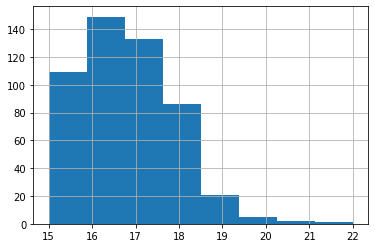

In [16]:
students['age'].hist(bins=8)

In [17]:
age_mean = pd.DataFrame(students.groupby('age')['avg_grade'].mean())

<AxesSubplot:xlabel='age', ylabel='avg_grade'>

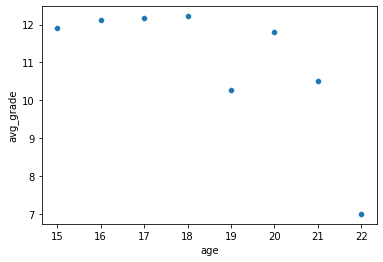

In [18]:
sns.scatterplot(x='age',y='avg_grade',data=age_mean)

## the higher column

<AxesSubplot:xlabel='higher', ylabel='avg_grade'>

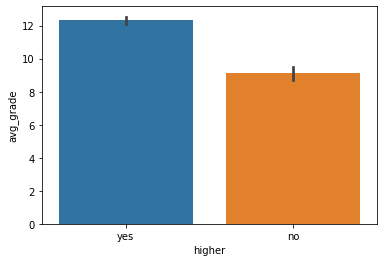

In [19]:
sns.barplot(x='higher',y='avg_grade', data=students)

<AxesSubplot:xlabel='higher', ylabel='avg_grade'>

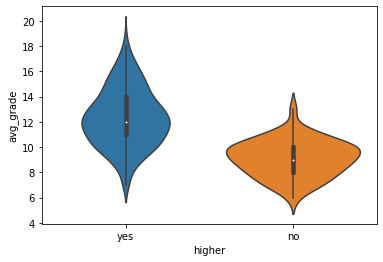

In [20]:
sns.violinplot(x='higher',y='avg_grade',data=students)

In [62]:
students.groupby('higher')['higher'].count()

higher
no      49
yes    457
Name: higher, dtype: int64

In [21]:
students.groupby('higher').mean()

,age,studytime,Fedu,Medu,failures,absences,avg_grade
higher,,,,,,,
no,17.489796,1.469388,1.734694,1.897959,0.693878,6.632653,9.122449
yes,16.485777,2.035011,2.446389,2.654267,0.133479,3.656455,12.317287


<AxesSubplot:xlabel='higher', ylabel='avg_grade'>

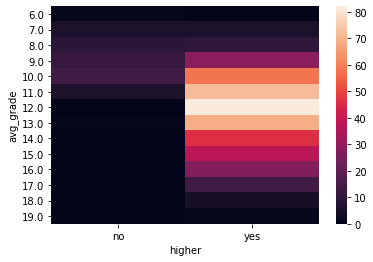

In [26]:
sns.heatmap(pd.crosstab(index=students['avg_grade'], columns=[students['higher']]))

In [22]:
'''
less than 10% of the students doesn't wish to take higher education
student wishing to take higher studies study more, have less absences and have better grades
we can make an hypothesis that it can be explained as a greater implication in their studies (more motivation)
'''

'\nstudent wishing to take higher studies study more, have less absences and have better grades\nwe can make an hypothesis that it can be explained as a greater implication in their studies (more motivation)\n'

## Studytime column 

In [23]:
students.groupby("studytime").mean()

,age,Fedu,Medu,failures,absences,avg_grade
studytime,,,,,,
1,16.474359,2.333333,2.455128,0.314103,4.935897,11.173077
2,16.605932,2.394068,2.610169,0.148305,3.868644,12.165254
3,16.829268,2.536585,2.707317,0.109756,2.682927,12.817073
4,16.312500,2.062500,2.656250,0.062500,2.906250,12.843750


In [60]:
students.groupby("studytime")['avg_grade'].describe()

,count,mean,std,min,25%,50%,75%,max
studytime,,,,,,,,
1,156.0,11.173077,2.396674,6.0,9.00,11.0,13.00,18.0
2,236.0,12.165254,2.286459,7.0,11.00,12.0,14.00,17.0
3,82.0,12.817073,2.341932,7.0,11.00,13.0,14.00,18.0
4,32.0,12.843750,2.713281,9.0,10.75,12.0,14.25,19.0


<AxesSubplot:xlabel='studytime', ylabel='avg_grade'>

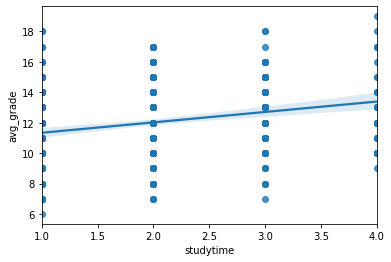

In [59]:
sns.regplot(x='studytime',y='avg_grade',data=students)

In [24]:
'''
study time doesn't seems to be conclusive. 
if people studying less have lesser grade, after more than 3 hours of weekly study there doesn't seem 
to change the avg_grade
however, people studying more are less prones to failures
'''

"\nstudy time doesn't seems to be conclusive. \nif people studying less have lesser grade, after 3 hours of weekly study there doesn't seem to be\na big change on avg_grade\nhowever, people studying more are less prones to failures\n"

## Influence of fathers' educational background

In [63]:
students.groupby('Fedu').mean()

,age,studytime,Medu,failures,absences,avg_grade
Fedu,,,,,,
0,17.000000,2.333333,2.000000,0.333333,1.666667,12.333333
1,16.768000,1.920000,1.664000,0.312000,3.576000,11.280000
2,16.600000,2.025000,2.281250,0.231250,4.112500,11.893750
3,16.517544,2.017544,3.087719,0.078947,4.228070,12.228070
4,16.394231,1.932692,3.605769,0.086538,3.884615,12.807692


In [64]:
students.groupby('Medu').mean()

,age,studytime,Fedu,failures,absences,avg_grade
Medu,,,,,,
0,17.000000,1.600000,1.600000,0.400000,1.000000,11.200000
1,16.554348,1.902174,1.402174,0.369565,3.706522,11.032609
2,16.688312,1.935065,1.935065,0.181818,4.220779,11.675325
3,16.710526,2.052632,2.657895,0.228070,4.631579,11.991228
4,16.368794,2.035461,3.297872,0.035461,3.347518,13.049645


In [28]:
print(students.groupby('Fedu')['avg_grade'].describe())
print(students.groupby('Medu')['avg_grade'].describe())

      count       mean       std  min   25%   50%   75%   max
Fedu                                                         
0       3.0  12.333333  4.163332  9.0  10.0  11.0  14.0  17.0
1     125.0  11.280000  2.391517  6.0  10.0  11.0  13.0  19.0
2     160.0  11.893750  2.524339  7.0  10.0  12.0  13.0  18.0
3     114.0  12.228070  2.157658  7.0  11.0  12.0  14.0  18.0
4     104.0  12.807692  2.327868  7.0  11.0  13.0  15.0  18.0
      count       mean       std  min   25%   50%    75%   max
Medu                                                          
0       5.0  11.200000  1.923538  9.0  10.0  11.0  12.00  14.0
1      92.0  11.032609  2.298834  6.0   9.0  11.0  12.25  17.0
2     154.0  11.675325  2.243023  7.0  10.0  11.5  13.00  18.0
3     114.0  11.991228  2.595079  7.0  10.0  12.0  14.00  19.0
4     141.0  13.049645  2.227511  7.0  12.0  13.0  15.00  18.0


<AxesSubplot:xlabel='Fedu', ylabel='avg_grade'>

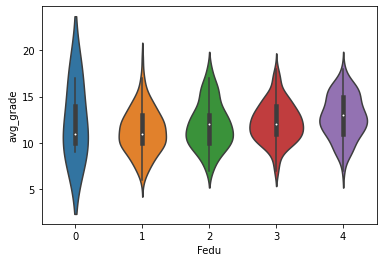

In [25]:
sns.violinplot(x='Fedu',y='avg_grade',data=students)

<AxesSubplot:xlabel='Medu', ylabel='avg_grade'>

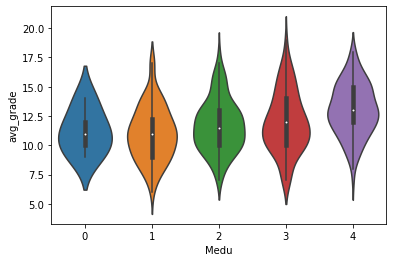

In [27]:
sns.violinplot(x='Medu',y='avg_grade',data=students)

<AxesSubplot:xlabel='Fedu', ylabel='avg_grade'>

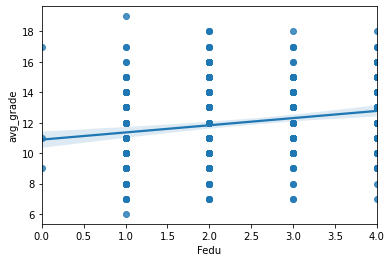

In [67]:
sns.regplot(x='Fedu', y='avg_grade', data=students)

<AxesSubplot:xlabel='Medu', ylabel='avg_grade'>

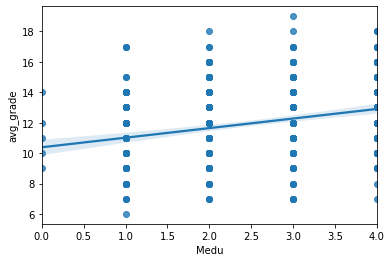

In [65]:
sns.regplot(x='Medu', y='avg_grade', data=students)

In [ ]:
'''
as Fedu and Medu 0 have less than 5 students each, we'll ignore them
Mean of the grades seems to increase linearly with father's education
'''

## Influence of sex on results 

In [34]:
students.groupby('sex').mean()

,age,studytime,Fedu,Medu,failures,absences,avg_grade
sex,,,,,,,
F,16.636364,2.117845,2.272727,2.417508,0.164983,3.942761,12.269360
M,16.507177,1.784689,2.526316,2.813397,0.220096,3.947368,11.636364


In [69]:
students.groupby('sex')['avg_grade'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,297.0,12.269360,2.365612,6.0,11.0,12.0,14.0,19.0
M,209.0,11.636364,2.477168,7.0,10.0,11.0,13.0,18.0


<AxesSubplot:xlabel='sex-studytime', ylabel='avg_grade'>

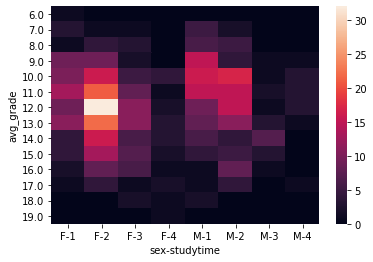

In [36]:
sns.heatmap(pd.crosstab(index=students['avg_grade'], columns=[students['sex'],students['studytime']]))

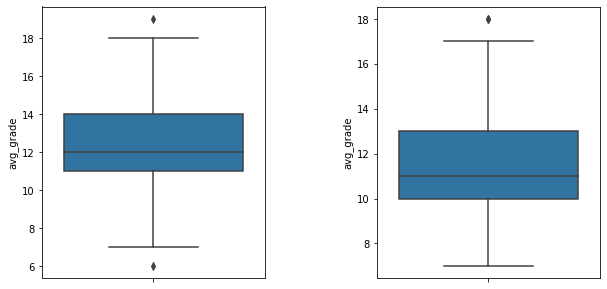

In [37]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=students.avg_grade[students['sex'] == 'F'], ax=ax[0])
sns.boxplot(y=students.avg_grade[students['sex'] == 'M'], ax=ax[1])
plt.subplots_adjust(wspace=0.5)

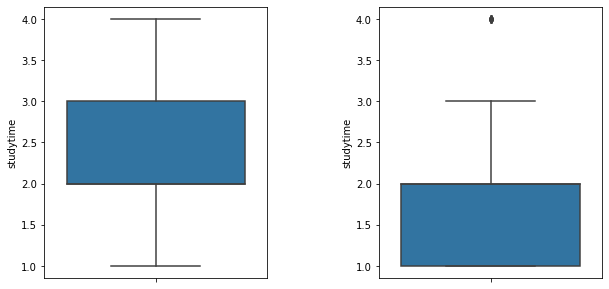

In [38]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=students.studytime[students['sex'] == 'F'], ax=ax[0])
sns.boxplot(y=students.studytime[students['sex'] == 'M'], ax=ax[1])
plt.subplots_adjust(wspace=0.5)

In [ ]:
'''
Female avg_grade is higher, as well as their studytime even tough fathers' education is lower
'''

In [107]:
students.groupby(['studytime','sex'])['avg_grade'].describe()

count       mean       std   min    25%   50%    75%   max
studytime sex                                                            
1         F     68.0  11.397059  2.305993   6.0  10.00  11.0  13.00  17.0
          M     88.0  11.000000  2.463527   7.0   9.00  11.0  12.25  18.0
2         F    146.0  12.301370  2.153969   7.0  11.00  12.0  14.00  17.0
          M     90.0  11.944444  2.483026   7.0  10.00  12.0  13.00  17.0
3         F     63.0  12.698413  2.473309   7.0  11.00  13.0  14.50  18.0
          M     19.0  13.210526  1.843274   9.0  12.50  14.0  14.00  16.0
4         F     20.0  13.650000  2.777257  10.0  11.75  13.5  15.25  19.0
          M     12.0  11.500000  2.067058   9.0  10.00  11.0  12.00  17.0

In [ ]:
'''
it also seems that except for a study time between 5h and 10h, female have higher average grade
'''

## Influence of studytime on grades

In [39]:
students.groupby('studytime').mean()

,age,Fedu,Medu,failures,absences,avg_grade
studytime,,,,,,
1,16.474359,2.333333,2.455128,0.314103,4.935897,11.173077
2,16.605932,2.394068,2.610169,0.148305,3.868644,12.165254
3,16.829268,2.536585,2.707317,0.109756,2.682927,12.817073
4,16.312500,2.062500,2.656250,0.062500,2.906250,12.843750


In [75]:
students.groupby('studytime')['avg_grade'].describe()

,count,mean,std,min,25%,50%,75%,max
studytime,,,,,,,,
1,156.0,11.173077,2.396674,6.0,9.00,11.0,13.00,18.0
2,236.0,12.165254,2.286459,7.0,11.00,12.0,14.00,17.0
3,82.0,12.817073,2.341932,7.0,11.00,13.0,14.00,18.0
4,32.0,12.843750,2.713281,9.0,10.75,12.0,14.25,19.0


<AxesSubplot:ylabel='studytime'>

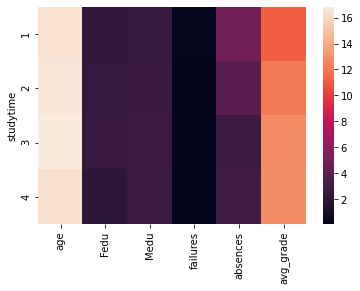

In [40]:
sns.heatmap(students.groupby('studytime').mean())

<AxesSubplot:xlabel='studytime', ylabel='avg_grade'>

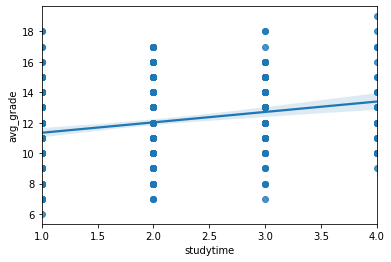

In [76]:
sns.regplot(x='studytime',y='avg_grade',data=students)

In [41]:
'''
the more one's study, the better the result
'''

"\nthe more one's study, the better the result\n"

# Other insights

## Schoolsup

In [84]:
students.groupby('schoolsup').mean()

,age,studytime,Fedu,Medu,failures,absences,avg_grade
schoolsup,,,,,,,
no,16.660674,1.955056,2.368539,2.600000,0.182022,4.087640,12.134831
yes,16.016393,2.163934,2.442623,2.442623,0.229508,2.901639,11.081967


In [89]:
students.groupby('schoolsup')['avg_grade'].describe()

,count,mean,std,min,25%,50%,75%,max
schoolsup,,,,,,,,
no,445.0,12.134831,2.490482,6.0,10.0,12.0,14.0,19.0
yes,61.0,11.081967,1.676257,7.0,10.0,11.0,12.0,14.0


In [ ]:
'''
with schoolsup comes lower avg_grade. it can be explained as : the school impose students schoolsup if their result
are lower than avg_grade
'''

## Famsup 

In [88]:
students.groupby('famsup').mean()

,age,studytime,Fedu,Medu,failures,absences,avg_grade
famsup,,,,,,,
no,16.709497,1.798883,2.217877,2.418994,0.189944,4.022346,11.843575
yes,16.513761,2.079511,2.464832,2.669725,0.186544,3.902141,12.097859


In [91]:
students.groupby('famsup')['studytime'].describe()

,count,mean,std,min,25%,50%,75%,max
famsup,,,,,,,,
no,179.0,1.798883,0.823666,1.0,1.0,2.0,2.0,4.0
yes,327.0,2.079511,0.850717,1.0,1.5,2.0,3.0,4.0


In [90]:
students.groupby('famsup')['avg_grade'].describe()

,count,mean,std,min,25%,50%,75%,max
famsup,,,,,,,,
no,179.0,11.843575,2.402737,7.0,10.0,12.0,13.0,18.0
yes,327.0,12.097859,2.443765,6.0,10.0,12.0,14.0,19.0


In [ ]:
'''
the family support correspond to an higher study time as well as an higher fathers' education
'''

## paid support

In [93]:
students.groupby('paid').mean()

,age,studytime,Fedu,Medu,failures,absences,avg_grade
paid,,,,,,,
no,16.586134,1.981092,2.352941,2.552521,0.172269,3.991597,12.046218
yes,16.533333,1.966667,2.766667,3.033333,0.433333,3.200000,11.400000


In [94]:
students.groupby('paid')['avg_grade'].describe()

,count,mean,std,min,25%,50%,75%,max
paid,,,,,,,,
no,476.0,12.046218,2.441304,6.0,10.0,12.0,14.0,19.0
yes,30.0,11.400000,2.190890,8.0,10.0,11.0,12.0,16.0


In [ ]:
'''
there is about 6% of students that have a paid support
we can see that those having paid support have fathers' with higher level of education. it may be explain because
of the economical effort. only parents with superior income may pay for it and they will do it if their child
have difficulties
'''

## internet

In [85]:
students.groupby('internet').mean()

,age,studytime,Fedu,Medu,failures,absences,avg_grade
internet,,,,,,,
no,16.451923,1.913462,2.019231,2.048077,0.288462,3.355769,11.442308
yes,16.616915,1.997512,2.470149,2.718905,0.161692,4.097015,12.154229


In [86]:
students.groupby('internet')['avg_grade'].describe()

,count,mean,std,min,25%,50%,75%,max
internet,,,,,,,,
no,104.0,11.442308,2.460669,7.0,10.00,11.0,13.0,19.0
yes,402.0,12.154229,2.403467,6.0,10.25,12.0,14.0,18.0


In [ ]:
'''
the access to internet correspond to an higher avg_grade
it can be explained by an easier access to informations and study material
'''

<AxesSubplot:xlabel='sex-schoolsup-famsup-higher-internet', ylabel='avg_grade'>

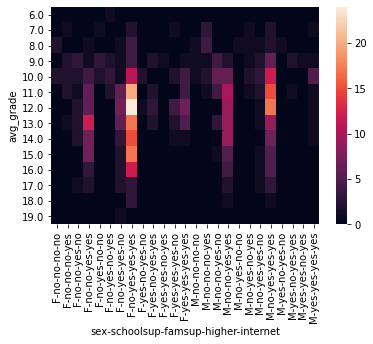

In [96]:
sns.heatmap(pd.crosstab(index=students['avg_grade'], columns=[students['sex'],students['schoolsup'],students['famsup'],students['higher'],students['internet']]))

In [102]:
students[(students['studytime'] > 2) & (students['schoolsup'] == 'no') & (students['famsup'] == 'yes') & (students['higher'] == 'yes') & (students['internet'] == 'yes') & (students['Fedu'] > 2) & (students['Medu'] > 2)]['avg_grade'].describe()

count    30.000000
mean     13.233333
std       2.430884
min       7.000000
25%      12.000000
50%      13.500000
75%      14.750000
max      18.000000
Name: avg_grade, dtype: float64

# Conclusion

In [ ]:
'''
even with the accumulation of "ideal" condition the grades are only about 1 grades higher (13.23 instead of 12.01)
we can suppose 2 things:
first: the good conditions are not cumulative
second : the very good students have rare whatever the conditions are
'''

In [ ]:
'''
There is a lot to be said on this dataset
we could study further the correlation between each columns 
we could also see the columns I did not keep for this project.
Also, we can try to see if those result are coherent with the dataset which contain the results of mathematics class.

There could be some insight on the sociological aspect. We can see for exemple that most than half of the time,
in a couple education level are similar. There may be some others insight to be made
'''